# Initial Imports - DO NOT DELETE

## Special imports for cookiecutter

In [1]:
# DO NOT REMOVE THESE
%load_ext autoreload
%autoreload 1
#%aimport src.base

The autoreload module is not an IPython extension.


UsageError: Line magic function `%autoreload` not found.


In [2]:
# DO NOT REMOVE This
%reload_ext autoreload

In [3]:
## DO NOT REMOVE
## import local src module -
## src in this project will contain all your local code
## clean_data.py, model.py, visualize.py, custom.py

#import src.base with alias to avoid namespace clashes

#from src import base as fis

In [4]:
#fis.test_base()

## Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

remote = True

In [12]:
localpath = '../data/processed/'
filename = 'zillow_chicago_df.csv'


# get the original data and save it immediately
# if remote:
#     print('Retrieving remote data')
#     remotefileurl = 'https://raw.githubusercontent.com/learn-co-students/dc_ds_04_22_19/master/module_4/project/data/zillow_data.csv'
#     raw_df = pd.read_csv(remotefileurl)
    
#     # Save the raw data locally so we don't have to use the repo again.
#     raw_df.to_csv(localpath+filename, index=False)
    
#     #set remote to false so we don't always read from the repo
#     remote=False
# else:
#     raw_df = pd.read_csv(localpath+filename)

raw_df = pd.read_csv(localpath+filename)
zillow_df = raw_df.copy()

In [2]:
temp_df = pd.read_csv('../data/processed/zillow_chicago_df.csv').iloc[:,1:]
temp_df

,date,60657,60614,60640,60647,60618,60613,60629,60625,60619,...,60612,60607,60659,60652,60631,60656,60655,60646,60642,60633
0,1996-04-01,334200.0,498100.0,216500.0,122700.0,142600.0,297900.0,93400.0,148900.0,76400.0,...,100900.0,215600.0,165400.0,103700.0,180900.0,166300.0,125700.0,197300.0,224100.0,77900.0
1,1996-05-01,335400.0,500900.0,216700.0,122800.0,143100.0,300400.0,94100.0,149300.0,77000.0,...,101400.0,215100.0,165300.0,104400.0,182200.0,166900.0,126300.0,198900.0,223300.0,78200.0
2,1996-06-01,336500.0,503100.0,216900.0,122800.0,143400.0,302600.0,94600.0,149600.0,77400.0,...,101900.0,214500.0,165000.0,104700.0,183100.0,167200.0,126600.0,200100.0,222400.0,78300.0
3,1996-07-01,337600.0,504600.0,217000.0,122700.0,143300.0,304700.0,94800.0,149700.0,77700.0,...,102300.0,213900.0,164600.0,104700.0,183500.0,167100.0,126500.0,200800.0,221500.0,78500.0
4,1996-08-01,338500.0,505500.0,217100.0,122400.0,142900.0,306600.0,94700.0,149700.0,77700.0,...,102700.0,213200.0,164100.0,104400.0,183400.0,166900.0,126100.0,201000.0,220500.0,78500.0
5,1996-09-01,339500.0,505700.0,217200.0,122000.0,142200.0,308400.0,94200.0,149400.0,77500.0,...,103100.0,212600.0,163500.0,103700.0,182900.0,166300.0,125400.0,200500.0,219600.0,78400.0
6,1996-10-01,340400.0,505300.0,217500.0,121500.0,141300.0,310200.0,93500.0,149100.0,77200.0,...,103500.0,212000.0,162800.0,102800.0,181800.0,165400.0,124200.0,199500.0,218700.0,78300.0
7,1996-11-01,341300.0,504200.0,217900.0,120900.0,140100.0,311800.0,92500.0,148500.0,76600.0,...,103800.0,211400.0,162100.0,101600.0,180400.0,164300.0,122900.0,198000.0,218100.0,78100.0
8,1996-12-01,342600.0,503600.0,218600.0,120500.0,139000.0,314100.0,91600.0,148100.0,76200.0,...,104200.0,211000.0,161500.0,100500.0,179100.0,163400.0,121600.0,196600.0,217800.0,77900.0
9,1997-01-01,344400.0,503400.0,219700.0,120300.0,138000.0,316600.0,90800.0,147900.0,75800.0,...,104800.0,210900.0,161100.0,99500.0,177900.0,162500.0,120400.0,195400.0,217800.0,77700.0


In [7]:
temp_df['date'] = pd.to_datetime(temp_df.date, format='%Y-%m-%d')
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 42 columns):
date     265 non-null datetime64[ns]
60657    265 non-null float64
60614    265 non-null float64
60640    265 non-null float64
60647    265 non-null float64
60618    265 non-null float64
60613    265 non-null float64
60629    265 non-null float64
60625    265 non-null float64
60619    265 non-null float64
60610    265 non-null float64
60611    58 non-null float64
60620    265 non-null float64
60634    265 non-null float64
60626    265 non-null float64
60649    265 non-null float64
60616    265 non-null float64
60622    265 non-null float64
60615    265 non-null float64
60641    265 non-null float64
60660    265 non-null float64
60608    265 non-null float64
60638    265 non-null float64
60639    265 non-null float64
60630    265 non-null float64
60643    265 non-null float64
60632    265 non-null float64
60605    265 non-null float64
60645    265 non-null float64
60651    265 non-nu

In [8]:
temp_df.set_index('date', inplace=True)

In [9]:
temp_df.head()

,60657,60614,60640,60647,60618,60613,60629,60625,60619,60610,...,60612,60607,60659,60652,60631,60656,60655,60646,60642,60633
date,,,,,,,,,,,,,,,,,,,,,
1996-04-01,334200.0,498100.0,216500.0,122700.0,142600.0,297900.0,93400.0,148900.0,76400.0,435200.0,...,100900.0,215600.0,165400.0,103700.0,180900.0,166300.0,125700.0,197300.0,224100.0,77900.0
1996-05-01,335400.0,500900.0,216700.0,122800.0,143100.0,300400.0,94100.0,149300.0,77000.0,435200.0,...,101400.0,215100.0,165300.0,104400.0,182200.0,166900.0,126300.0,198900.0,223300.0,78200.0
1996-06-01,336500.0,503100.0,216900.0,122800.0,143400.0,302600.0,94600.0,149600.0,77400.0,435100.0,...,101900.0,214500.0,165000.0,104700.0,183100.0,167200.0,126600.0,200100.0,222400.0,78300.0
1996-07-01,337600.0,504600.0,217000.0,122700.0,143300.0,304700.0,94800.0,149700.0,77700.0,434600.0,...,102300.0,213900.0,164600.0,104700.0,183500.0,167100.0,126500.0,200800.0,221500.0,78500.0
1996-08-01,338500.0,505500.0,217100.0,122400.0,142900.0,306600.0,94700.0,149700.0,77700.0,433900.0,...,102700.0,213200.0,164100.0,104400.0,183400.0,166900.0,126100.0,201000.0,220500.0,78500.0


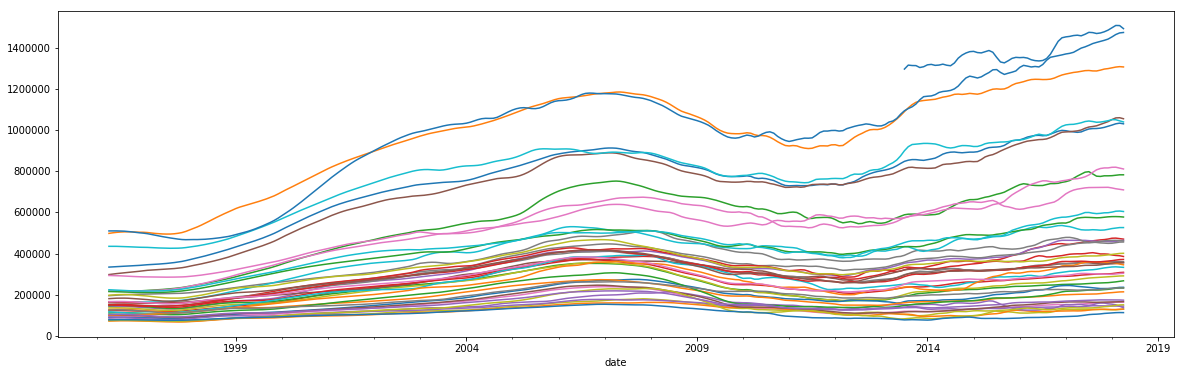

In [17]:
ax = temp_df.plot(figsize=(20,6))
ax.get_legend().remove()

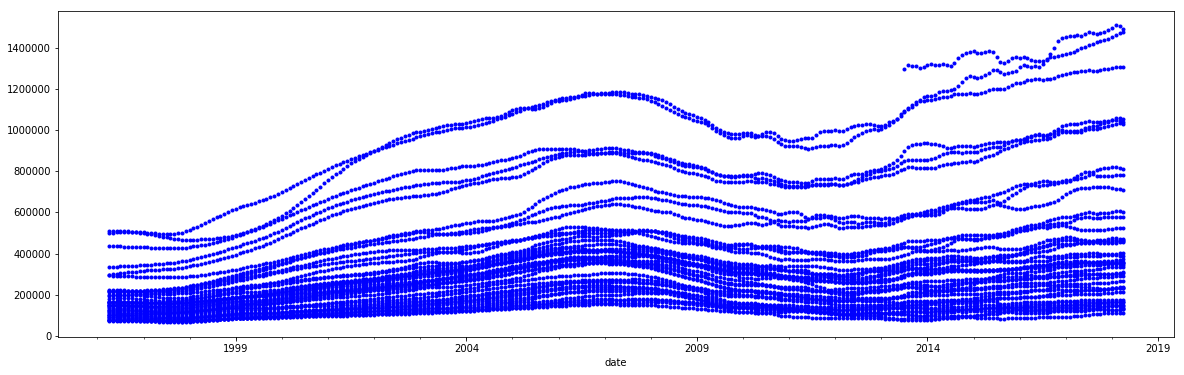

In [28]:
ax = temp_df.plot(figsize=(20,6), style = '.b')
ax.get_legend().remove()

In [21]:
temp_df.columns

Index(['60657', '60614', '60640', '60647', '60618', '60613', '60629', '60625',
       '60619', '60610', '60611', '60620', '60634', '60626', '60649', '60616',
       '60622', '60615', '60641', '60660', '60608', '60638', '60639', '60630',
       '60643', '60632', '60605', '60645', '60651', '60653', '60654', '60612',
       '60607', '60659', '60652', '60631', '60656', '60655', '60646', '60642',
       '60633'],
      dtype='object')

In [40]:
temp_df.loc['1996-04-01']

60657    334200.0
60614    498100.0
60640    216500.0
60647    122700.0
60618    142600.0
60613    297900.0
60629     93400.0
60625    148900.0
60619     76400.0
60610    435200.0
60611         NaN
60620     71900.0
60634    146800.0
60626    150900.0
60649     77400.0
60616    160600.0
60622    217000.0
60615    195300.0
60641    135700.0
60660    166000.0
60608     89800.0
60638    127400.0
60639    111200.0
60630    150600.0
60643     86400.0
60632     99600.0
60605    293500.0
60645    164900.0
60651     74700.0
60653    116900.0
60654    510000.0
60612    100900.0
60607    215600.0
60659    165400.0
60652    103700.0
60631    180900.0
60656    166300.0
60655    125700.0
60646    197300.0
60642    224100.0
60633     77900.0
Name: 1996-04-01 00:00:00, dtype: float64

In [32]:
temp_df.index

DatetimeIndex(['1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01',
               '1996-08-01', '1996-09-01', '1996-10-01', '1996-11-01',
               '1996-12-01', '1997-01-01',
               ...
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01'],
              dtype='datetime64[ns]', name='date', length=265, freq=None)

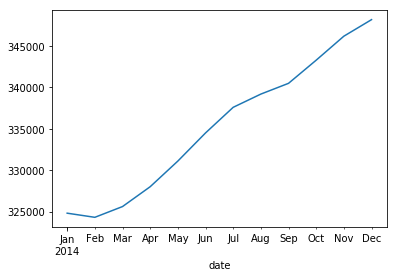

In [27]:
temp_df.loc['2014','60647'].plot()

# Data Collection

In [14]:
zillow_df.tail()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400
14722,95851,89155,Mesquite,NV,Las Vegas,Clark,14723,176400.0,176300.0,176100.0,...,333800,336400,339700,343800,346800,348900,350400,353000,356000,357200


In [5]:
zillow_df.shape

(14723, 272)

In [17]:
zillow_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 43 columns):
Unnamed: 0    265 non-null int64
date          265 non-null object
60657         265 non-null float64
60614         265 non-null float64
60640         265 non-null float64
60647         265 non-null float64
60618         265 non-null float64
60613         265 non-null float64
60629         265 non-null float64
60625         265 non-null float64
60619         265 non-null float64
60610         265 non-null float64
60611         58 non-null float64
60620         265 non-null float64
60634         265 non-null float64
60626         265 non-null float64
60649         265 non-null float64
60616         265 non-null float64
60622         265 non-null float64
60615         265 non-null float64
60641         265 non-null float64
60660         265 non-null float64
60608         265 non-null float64
60638         265 non-null float64
60639         265 non-null float64
60630         265 non-nu

In [23]:
zillow_df.describe()

,60657,60614,60640,60647,60618,60613,60629,60625,60619,60610,...,60612,60607,60659,60652,60631,60656,60655,60646,60642,60633
count,2.650000e+02,2.650000e+02,265.000000,265.000000,265.000000,2.650000e+02,265.000000,265.000000,265.000000,2.650000e+02,...,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000
mean,7.439789e+05,9.741392e+05,553078.867925,293135.471698,316441.132075,7.162766e+05,145572.452830,330923.018868,120266.037736,7.800868e+05,...,243598.113208,417041.132075,296586.792453,150041.509434,298997.358491,263675.094340,192772.830189,333294.716981,424144.528302,105211.698113
std,1.908211e+05,2.312259e+05,167499.870439,97412.855511,96112.225708,1.972157e+05,43406.557113,93507.227269,28518.404102,1.738772e+05,...,76955.057946,99293.470399,73280.550661,34232.310373,66842.258004,60514.191161,43548.942529,74299.319724,98538.344993,23603.241442
min,3.342000e+05,4.947000e+05,216500.000000,118700.000000,130400.000000,2.979000e+05,83600.000000,145400.000000,69800.000000,4.257000e+05,...,100900.000000,210700.000000,158100.000000,92100.000000,168200.000000,156100.000000,110800.000000,183200.000000,217700.000000,75400.000000
25%,6.734000e+05,8.782000e+05,455200.000000,230000.000000,262900.000000,6.295000e+05,113300.000000,274700.000000,103500.000000,7.262000e+05,...,196500.000000,370600.000000,259900.000000,127300.000000,258900.000000,220300.000000,153000.000000,297100.000000,386000.000000,85600.000000
50%,7.756000e+05,1.006300e+06,585900.000000,302500.000000,328900.000000,7.504000e+05,135600.000000,344300.000000,118600.000000,8.084000e+05,...,236800.000000,433000.000000,305800.000000,144200.000000,304600.000000,265200.000000,199700.000000,340600.000000,438300.000000,98300.000000
75%,8.899000e+05,1.162800e+06,686100.000000,367700.000000,391900.000000,8.478000e+05,164900.000000,399800.000000,133400.000000,9.058000e+05,...,312800.000000,491000.000000,354100.000000,172400.000000,342100.000000,300600.000000,223900.000000,382100.000000,491500.000000,121400.000000
max,1.033800e+06,1.308500e+06,798000.000000,475100.000000,464700.000000,1.060200e+06,239100.000000,464200.000000,180100.000000,1.050800e+06,...,361400.000000,579700.000000,418900.000000,218700.000000,416100.000000,383300.000000,262900.000000,467600.000000,606700.000000,153600.000000


In [22]:
zillow_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [24]:
zillow_df.set_index('date', inplace=True)

In [25]:
zillow_df.head()

,60657,60614,60640,60647,60618,60613,60629,60625,60619,60610,...,60612,60607,60659,60652,60631,60656,60655,60646,60642,60633
date,,,,,,,,,,,,,,,,,,,,,
1996-04-01,334200.0,498100.0,216500.0,122700.0,142600.0,297900.0,93400.0,148900.0,76400.0,435200.0,...,100900.0,215600.0,165400.0,103700.0,180900.0,166300.0,125700.0,197300.0,224100.0,77900.0
1996-05-01,335400.0,500900.0,216700.0,122800.0,143100.0,300400.0,94100.0,149300.0,77000.0,435200.0,...,101400.0,215100.0,165300.0,104400.0,182200.0,166900.0,126300.0,198900.0,223300.0,78200.0
1996-06-01,336500.0,503100.0,216900.0,122800.0,143400.0,302600.0,94600.0,149600.0,77400.0,435100.0,...,101900.0,214500.0,165000.0,104700.0,183100.0,167200.0,126600.0,200100.0,222400.0,78300.0
1996-07-01,337600.0,504600.0,217000.0,122700.0,143300.0,304700.0,94800.0,149700.0,77700.0,434600.0,...,102300.0,213900.0,164600.0,104700.0,183500.0,167100.0,126500.0,200800.0,221500.0,78500.0
1996-08-01,338500.0,505500.0,217100.0,122400.0,142900.0,306600.0,94700.0,149700.0,77700.0,433900.0,...,102700.0,213200.0,164100.0,104400.0,183400.0,166900.0,126100.0,201000.0,220500.0,78500.0


# Title

## Subtitle

In [90]:
def detrend(TS, column):
        p_values = []
        
        decomposition=seasonal_decompose(TS[column].dropna())
        residuals = decomposition.resid
        dftest = adfuller(residuals.dropna())
        dfoutput1 = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
        for key, value in dftest[4].items():
            dfoutput1['Critical Values (%s)' %key] = value
        p_values.append(dfoutput1[1])
        
    
        data_diff1 = TS[column].diff(periods=1)
        dftest = adfuller(data_diff1.dropna())
        dfoutput2 = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
        for key, value in dftest[4].items():
            dfoutput2['Critical Values (%s)' %key] = value
        p_values.append(dfoutput2[1])
    
        data_diff2 = TS[column].apply(lambda x: np.log(x)) - TS[column].apply(lambda x: np.log(x)).shift(1)
        dftest = adfuller(data_diff2.dropna())
        dfoutput3 = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
        for key, value in dftest[4].items():
            dfoutput3['Critical Values (%s)' %key] = value
        p_values.append(dfoutput3[1])
        

        temp_diff = TS[column].apply(lambda x: np.log(x)) - TS[column].apply(lambda x: np.log(x)).shift(1)
        data_diff3 = temp_diff - temp_diff.shift(12)  
        dftest = adfuller(data_diff3.dropna())
        dfoutput4 = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
        for key, value in dftest[4].items():
            dfoutput4['Critical Values (%s)' %key] = value
        p_values.append(dfoutput4[1])
        
        if np.argmin(p_values)==0:
            residuals.plot(figsize=(20,6))
            plt.title('{} Seasonal Decomposition'.format(column))
            plt.show();
            print(dfoutput1)
        
        elif np.argmin(p_values)==1:
            data_diff1.plot(figsize=(20,6))
            plt.title('{} First Difference'.format(column))
            plt.show();
            print(dfoutput2)
            
        elif np.argmin(p_values)==2:
            data_diff1.plot(figsize=(20,6))
            plt.title('{} Log First Difference'.format(column))
            plt.show();
            print(dfoutput3)
        
        elif np.argmin(p_values)==3:
            data_diff1.plot(figsize=(20,6))
            plt.title('{} Log Seasonal First Difference'.format(column))
            plt.show();
            print(dfoutput4)
        

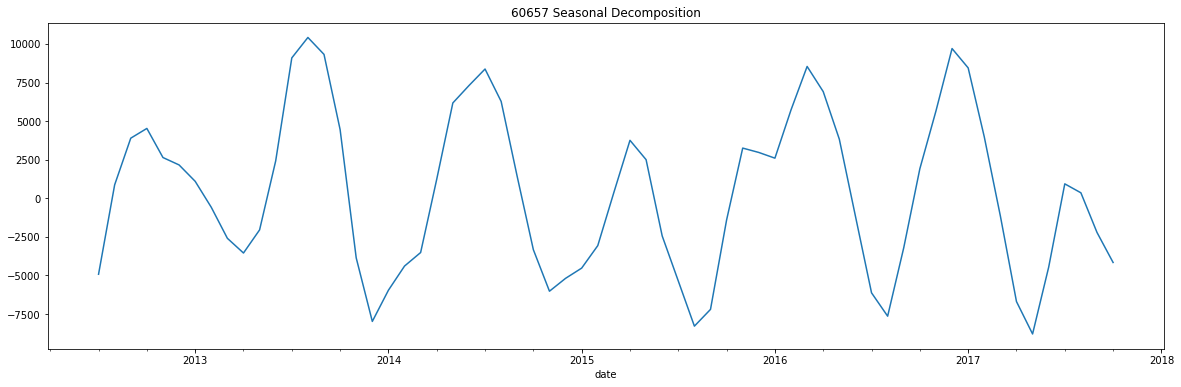

Test Statistic                 -3.416750
p-value                         0.010401
#Lags Used                      4.000000
Number of Observations Used    59.000000
Critical Values (1%)           -3.546395
Critical Values (5%)           -2.911939
Critical Values (10%)          -2.593652
dtype: float64


In [92]:
detrend(temp_df['2012':], '60657')

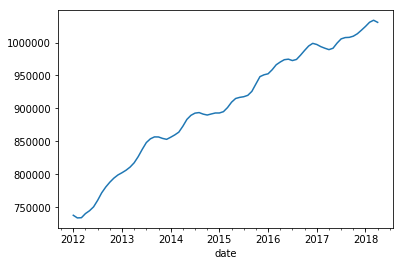

In [51]:
temp_df.loc['2012':,'60657'].plot()

In [52]:
temp_df.tail()

,60657,60614,60640,60647,60618,60613,60629,60625,60619,60610,...,60612,60607,60659,60652,60631,60656,60655,60646,60642,60633
date,,,,,,,,,,,,,,,,,,,,,
2017-12-01,1018700.0,1299000.0,777900.0,470600.0,457900.0,1041300.0,162600.0,463100.0,127800.0,1045700.0,...,355200.0,578500.0,363400.0,174600.0,350400.0,299000.0,229800.0,393500.0,598500.0,110400.0
2018-01-01,1024400.0,1302700.0,778500.0,474500.0,457400.0,1051300.0,163500.0,464100.0,127100.0,1050800.0,...,353400.0,579500.0,365500.0,174700.0,353900.0,299300.0,231100.0,395700.0,601500.0,111500.0
2018-02-01,1030700.0,1306400.0,780500.0,475100.0,459000.0,1059300.0,164000.0,464200.0,126800.0,1050400.0,...,352300.0,579700.0,368300.0,174700.0,356400.0,300800.0,232400.0,398400.0,605800.0,112800.0
2018-03-01,1033800.0,1308500.0,782800.0,472600.0,462500.0,1060200.0,164000.0,463200.0,128000.0,1045000.0,...,349000.0,579200.0,370800.0,174300.0,356900.0,303000.0,233000.0,400600.0,606700.0,113300.0
2018-04-01,1030600.0,1307000.0,782800.0,470200.0,464300.0,1055300.0,163800.0,461100.0,129600.0,1039700.0,...,345400.0,577600.0,371400.0,173500.0,356200.0,304000.0,232600.0,401300.0,604400.0,113000.0
